In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/store/subset.csv")

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,2,2013-01-01,1,BEAUTY,0.0,0
1,7,2013-01-01,1,CLEANING,0.0,0
2,30,2013-01-01,1,PRODUCE,0.0,0
3,35,2013-01-01,10,BEAUTY,0.0,0
4,40,2013-01-01,10,CLEANING,0.0,0


In [4]:
df = df.sort_values(by=["store_nbr", "family", "date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50520 entries, 0 to 50495
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50520 non-null  int64  
 1   date         50520 non-null  object 
 2   store_nbr    50520 non-null  int64  
 3   family       50520 non-null  object 
 4   sales        50520 non-null  float64
 5   onpromotion  50520 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.7+ MB


### Data exploration and feature engineering

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

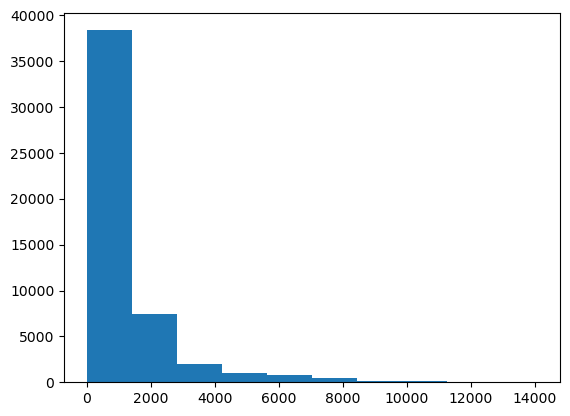

In [7]:
plt.hist(df['sales'])
plt.show()

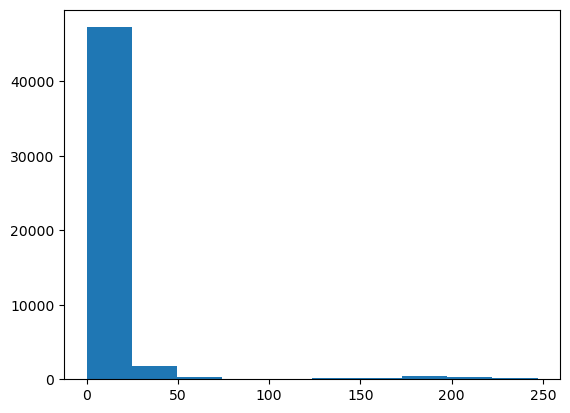

In [8]:
plt.hist(df['onpromotion'])
plt.show()

In [9]:
df['sales_log'] = np.log(df['sales'] + 1)
df['onpromotion_log'] = np.log(df['onpromotion'] + 1)

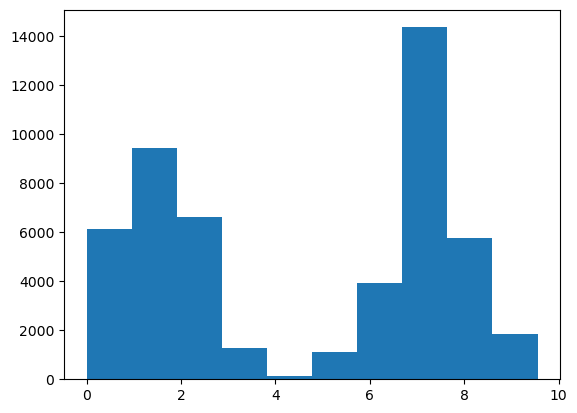

In [10]:
plt.hist(df['sales_log'])
plt.show()

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

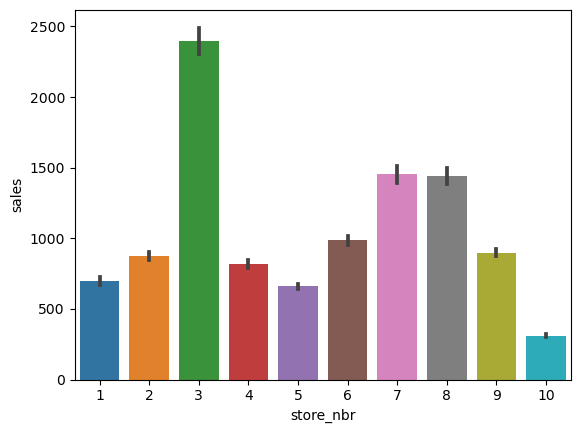

In [11]:
sns.barplot(df, x='store_nbr', y='sales')

<AxesSubplot:xlabel='family', ylabel='sales'>

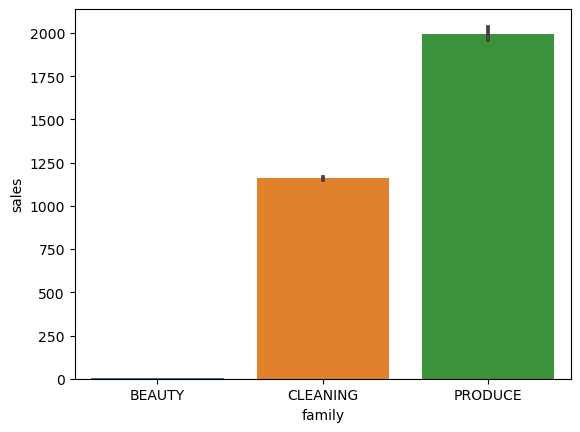

In [12]:
sns.barplot(df, x='family', y='sales')

In [13]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,sales_log,onpromotion_log
0,2,2013-01-01,1,BEAUTY,0.0,0,0.000000,0.0
30,1784,2013-01-02,1,BEAUTY,2.0,0,1.098612,0.0
60,3566,2013-01-03,1,BEAUTY,0.0,0,0.000000,0.0
90,5348,2013-01-04,1,BEAUTY,3.0,0,1.386294,0.0
120,7130,2013-01-05,1,BEAUTY,3.0,0,1.386294,0.0


### Feature engineering on time features

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['month'] = df['date'].dt.month.astype('int8')

In [16]:
# df['day_of_month'] = df['date'].dt.day.astype('int8')

In [17]:
df['week_of_month'] = df['date'].apply(lambda d: (d.day -1) //7 + 1).astype("int8")

In [18]:
df['day_of_week'] = (df['date'].dt.dayofweek + 1).astype("int8")

In [19]:
df['year'] = df['date'].dt.year.astype("int32")

In [20]:
df['is_wknd'] = (df['date'].dt.weekday // 4).astype("int8")

In [21]:
df['quarter'] = df['date'].dt.quarter.astype('int8')

In [22]:
df['is_month_start'] = df['date'].dt.is_month_start.astype("int8")

In [23]:
df['is_month_end'] = df['date'].dt.is_month_end.astype("int8")

In [24]:
df['is_year_start'] = df['date'].dt.is_year_start.astype("int8")
df['is_year_end'] = df['date'].dt.is_year_end.astype("int8")

In [25]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'sales_log', 'onpromotion_log', 'month', 'week_of_month', 'day_of_week',
       'year', 'is_wknd', 'quarter', 'is_month_start', 'is_month_end',
       'is_year_start', 'is_year_end'],
      dtype='object')

Out of these new features, we can also one hot-encoding month, week_of_month, day_of_week and year 

In [26]:
df = pd.get_dummies(df, columns=['month', 'week_of_month', 'day_of_week', 'year', 'quarter'])

In [27]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'sales_log', 'onpromotion_log', 'is_wknd', 'is_month_start',
       'is_month_end', 'is_year_start', 'is_year_end', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'week_of_month_1',
       'week_of_month_2', 'week_of_month_3', 'week_of_month_4',
       'week_of_month_5', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

### Getting some lag features

if you rememebr ARIMA, a good predictor for future data is past data. We can create similar features to approximate that. 

However, we cannot directly use the shift and lag function; because we have more than 1 time seires. If we use those functions directly, the data from one time series will pollute the next time series!

In [28]:
df['sales_lag'] = df.groupby(['store_nbr', 'family'])['sales_log'].shift().fillna(0)

In [29]:
df = pd.get_dummies(df, columns=['family', 'store_nbr'])

In [30]:
df.columns

Index(['id', 'date', 'sales', 'onpromotion', 'sales_log', 'onpromotion_log',
       'is_wknd', 'is_month_start', 'is_month_end', 'is_year_start',
       'is_year_end', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'week_of_month_1', 'week_of_month_2', 'week_of_month_3',
       'week_of_month_4', 'week_of_month_5', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'day_of_week_7', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4',
       'sales_lag', 'family_BEAUTY', 'family_CLEANING', 'family_PRODUCE',
       'store_nbr_1', 'store_nbr_2', 'store_nbr_3', 'store_nbr_4',
       'store_nbr_5', 'store_nbr_6', 'store_nbr_7', 'store_nbr_8',
       'store_nbr_9', 'store_nbr_10'],
      dtype='object')

In [31]:
train = df[df['date'] < '2017-01-01']
valid= df[df['date'] >= '2017-01-01' ]

In [32]:
len(train), len(valid)

(43710, 6810)

In [33]:
train = train.drop(['id', 'date', 'sales', 'onpromotion'], axis=1)
valid = valid.drop(['id', 'date', 'sales', 'onpromotion'], axis=1)

In [34]:
train.shape, valid.shape

((43710, 54), (6810, 54))

In [35]:
train.columns


Index(['sales_log', 'onpromotion_log', 'is_wknd', 'is_month_start',
       'is_month_end', 'is_year_start', 'is_year_end', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'week_of_month_1',
       'week_of_month_2', 'week_of_month_3', 'week_of_month_4',
       'week_of_month_5', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4', 'sales_lag',
       'family_BEAUTY', 'family_CLEANING', 'family_PRODUCE', 'store_nbr_1',
       'store_nbr_2', 'store_nbr_3', 'store_nbr_4', 'store_nbr_5',
       'store_nbr_6', 'store_nbr_7', 'store_nbr_8', 'store_nbr_9',
       'store_nbr_10'],
      dtype='object')

### Train linear regression models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
y_train = train['sales_log']
X_train = train.drop(['sales_log'], axis = 1)

In [38]:
y_valid = valid['sales_log']
X_valid = valid.drop(['sales_log'], axis = 1)

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_valid)
train_pred = model.predict(X_train)

In [42]:
np.sqrt(mean_squared_error(train_pred, y_train))

0.6897730126431724

In [43]:
np.sqrt(mean_squared_error(y_pred, y_valid))

2152202351025.441

In [44]:
model.coef_

array([ 8.42088572e-02,  1.40142818e+11,  1.71498515e-01,  1.31508505e-02,
       -3.93094049e+00, -2.34873592e-01,  7.43160807e+09,  7.43160807e+09,
        7.43160807e+09, -2.42672989e+12, -2.42672989e+12, -2.42672989e+12,
       -2.21084502e+11, -2.21084502e+11, -2.21084502e+11, -5.84168925e+11,
       -5.84168925e+11, -5.84168925e+11, -1.02688278e+12, -1.02688278e+12,
       -1.02688278e+12, -1.02688278e+12, -1.02688278e+12,  2.07711355e+11,
        2.07711355e+11,  2.07711355e+11,  2.07711355e+11,  6.75685364e+10,
        6.75685364e+10,  6.75685364e+10,  2.08802167e+12,  2.08802167e+12,
        2.08802167e+12,  2.08802167e+12, -6.41806854e+10, -1.30675936e+12,
        1.12740214e+12, -1.07824325e+12, -7.15158826e+11,  9.01626587e-01,
       -3.75217748e+11, -3.75217748e+11, -3.75217748e+11, -1.04799543e+12,
       -1.04799543e+12, -1.04799543e+12, -1.04799543e+12, -1.04799543e+12,
       -1.04799543e+12, -1.04799543e+12, -1.04799543e+12, -1.04799543e+12,
       -1.04799543e+12])

In [45]:
X_train.shape

(43710, 53)

In [46]:
feature_imp = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False)

### Add regularization

In [47]:
from sklearn.linear_model import Ridge, Lasso

In [48]:
model_1 = Ridge(alpha = 1) 

In [49]:
model_1.fit(X_train, y_train)

Ridge(alpha=1)

In [51]:
y_pred = model_1.predict(X_valid)
train_pred = model_1.predict(X_train)
print(np.sqrt(mean_squared_error(y_pred, y_valid)))
print(np.sqrt(mean_squared_error(train_pred, y_train)))

0.6388473108574191
0.689667368174137


In [52]:
model_1.coef_

array([ 8.34054980e-02,  1.54249277e-01,  1.60161050e-01,  1.67780284e-02,
       -3.89348736e+00, -2.29403311e-01,  1.05235569e-01, -8.44137883e-02,
       -7.09997914e-03, -3.27944879e-02, -2.46932839e-02,  2.13657497e-02,
        2.71443048e-02, -4.37302354e-02,  2.56268441e-02, -1.23320103e-02,
        1.31740836e-02,  1.25172338e-02,  2.63671623e-02, -2.24362437e-02,
       -9.03778101e-03, -2.25059403e-02,  2.76128027e-02, -2.13803909e-01,
        1.60622521e-02,  9.85169756e-02, -5.50245962e-02,  1.01117124e-02,
        2.16216104e-01, -7.20785390e-02, -7.61388013e-02,  3.10306455e-02,
        8.81148843e-03,  3.62966673e-02,  0.00000000e+00,  1.37218016e-02,
       -3.61220222e-02,  9.04091349e-03,  1.33593071e-02,  9.01595609e-01,
       -2.49033818e-01,  2.14403499e-01,  3.46303182e-02, -3.38870320e-02,
        4.34254996e-03,  7.06107758e-02, -3.39737369e-03, -6.32203408e-03,
        2.10860923e-02,  2.33065244e-02,  2.16378570e-02, -9.06817155e-03,
       -8.83091881e-02])

In [55]:
model_2 = Lasso(alpha=0.1)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_valid)
train_pred = model_2.predict(X_train)
print(np.sqrt(mean_squared_error(y_pred, y_valid)))
print(np.sqrt(mean_squared_error(train_pred, y_train)))

0.7535826137158248
0.7525516447232098


In [56]:
model_2.coef_

array([ 0.02193539,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.95351465,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ])

In [60]:
feature_imp = pd.Series(model_1.coef_, index=X_train.columns).sort_values(ascending=False)

In [61]:
feature_imp

sales_lag          0.901596
day_of_week_6      0.216216
family_CLEANING    0.214403
is_month_start     0.160161
is_wknd            0.154249
month_1            0.105236
day_of_week_3      0.098517
onpromotion_log    0.083405
store_nbr_3        0.070611
year_2016          0.036297
family_PRODUCE     0.034630
year_2014          0.031031
week_of_month_5    0.027613
month_7            0.027144
week_of_month_1    0.026367
month_9            0.025627
store_nbr_7        0.023307
store_nbr_8        0.021638
month_6            0.021366
store_nbr_6        0.021086
is_month_end       0.016778
day_of_week_2      0.016062
quarter_1          0.013722
quarter_4          0.013359
month_11           0.013174
month_12           0.012517
day_of_week_5      0.010112
quarter_3          0.009041
year_2015          0.008811
store_nbr_2        0.004343
year_2017          0.000000
store_nbr_4       -0.003397
store_nbr_5       -0.006322
month_3           -0.007100
week_of_month_3   -0.009038
store_nbr_9       -0

## Train regression models using trees

In [63]:
from sklearn.ensemble import RandomForestRegressor

1. Train model
2. Print out errors (RMSE)
3. Find feature importance

In [64]:
tree_model = RandomForestRegressor()

In [65]:
tree_model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:

y_pred = tree_model.predict(X_valid)
train_pred = tree_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_pred, y_valid)))
print(np.sqrt(mean_squared_error(train_pred, y_train)))

0.41530216184518026
0.16328970184811403


In [68]:
feature_imp = pd.Series(tree_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [70]:
tree_model.n_estimators

100

### Scaling Variables

In [ ]:
df['onpromotion_log']

In [71]:
df['onpromotion_log_min_max_scaled'] = (df['onpromotion_log'] - df['onpromotion_log'].min()) / \
                                        (df['onpromotion_log'].max() - df['onpromotion_log'].min())

In [73]:
df['onpromotion_log_min_max_scaled'].min(), df['onpromotion_log_min_max_scaled'].max()

(0.0, 1.0)

In [74]:
df['onpromotion_log_z_scaled'] = (df['onpromotion_log'] - df['onpromotion_log'].mean()) / \
                                  df['onpromotion_log'].std()

In [75]:
df['onpromotion_log_z_scaled'].mean(), df['onpromotion_log_z_scaled'].std()

(8.032443365324871e-14, 1.0000000000002287)

Quiz: Can you find a better lambda value to further improve the performance of the model?